In [1]:
from keras.models import load_model
from keras.activations import (
    softmax,
    tanh,
    sigmoid,
    relu
)
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

def leakyReLu(input_):
    return relu(input_, alpha=.2)

get_custom_objects().update({'leakyReLu': Activation(leakyReLu)})

Using TensorFlow backend.


/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


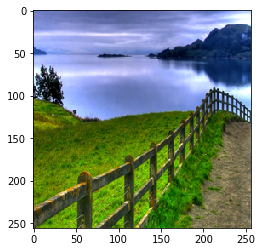

In [2]:
img = img = Image.open('test.jpg')
img = img.resize((256, 256), Image.ANTIALIAS)
plt.imshow(img)
img = np.resize(img, (1,256,256,3))
img = (img / 255.0 - .5) * 2

model = load_model('./conv2_adam_30epoch.h5')

236 133.31898498535156 10


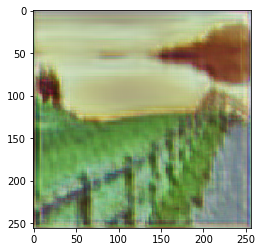

In [3]:
X_valid, Y_valid, X_, Y_, X__, Y__, X_identity, Y_identity = model.predict([img, img])
X_ = np.resize(X_, (256, 256, 3))
X_ = ((X_ + 1.) / 2 * 255.).astype(int)
print(np.max(X_), np.mean(X_), np.min(X_))
plt.imshow(X_)